In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load dataset
data = pd.read_csv(r"C:\Users\Rabiatu Mohammed\Downloads\medical-appointments-no-show-en.csv")
data

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49588,NaN,10:20,M,01/02/2022,yes,pai tem médico,intellectual,9/3/2009,5/11/2019,ITAJAÍ,...,0,0,NaN,NaN,NaN,NaN,0,0,no_rain,heavy_cold
49589,NaN,10:20,M,01/02/2022,yes,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,0,0,no_rain,heavy_cold
49590,NaN,11:00,M,01/02/2022,no,NaN,intellectual,7/3/2016,11/2/2020,BOMBINHAS,...,0,1,NaN,NaN,NaN,NaN,0,0,no_rain,heavy_cold
49591,psychotherapy,11:00,M,01/02/2022,yes,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,0,0,no_rain,heavy_cold


In [16]:
# Overview of the dataset
print(data.head())
print(data.info())
print(data.describe())


        specialty appointment_time gender appointment_date no_show  \
0   physiotherapy            13:20      M       09/09/2021     yes   
1   psychotherapy            13:20      M       09/09/2021      no   
2  speech therapy            13:20      F       09/09/2021      no   
3   physiotherapy            13:20      F       09/09/2021      no   
4   physiotherapy            14:00      M       09/09/2021      no   

  no_show_reason disability date_of_birth entry_service_date         city  \
0          surto        NaN           NaN                NaN          NaN   
1            NaN        NaN           NaN                NaN          NaN   
2            NaN        NaN           NaN                NaN          NaN   
3            NaN        NaN           NaN                NaN          NaN   
4            NaN      motor    10/10/1954           5/2/2020  B. CAMBORIU   

   ... over_60_years_old patient_needs_companion  average_temp_day  \
0  ...                 0                      

In [17]:
# Check for missing values
print(data.isnull().sum())

specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


In [18]:
# Convert 'appointment_date' to datetime, day-month-year format.
data['appointment_date'] = pd.to_datetime(data['appointment_date'], format='%d/%m/%Y')

# Convert 'date_of_birth' to datetime formats as missing values.
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], format='%d/%m/%Y', errors='coerce')


In [19]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   specialty                42139 non-null  object        
 1   appointment_time         49593 non-null  object        
 2   gender                   49593 non-null  object        
 3   appointment_date         49593 non-null  datetime64[ns]
 4   no_show                  49593 non-null  object        
 5   no_show_reason           1737 non-null   object        
 6   disability               44456 non-null  object        
 7   date_of_birth            39243 non-null  datetime64[ns]
 8   entry_service_date       44438 non-null  object        
 9   city                     44412 non-null  object        
 10  icd                      10717 non-null  object        
 11  appointment_month        49593 non-null  object        
 12  appointment_year         49593 n

In [20]:
# Check the first few rows to verify the date format
print(data[['appointment_date', 'date_of_birth']].head())


  appointment_date date_of_birth
0       2021-09-09           NaT
1       2021-09-09           NaT
2       2021-09-09           NaT
3       2021-09-09           NaT
4       2021-09-09    1954-10-10


In [21]:
# Confirm that the data types have been converted to datetime
print(data[['appointment_date', 'date_of_birth']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_date  49593 non-null  datetime64[ns]
 1   date_of_birth     39243 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 775.0 KB
None


In [22]:
# Check for NaT values which shows failed conversion
nat_counts = data[['appointment_date', 'date_of_birth']].isna().sum()
print(nat_counts)


appointment_date        0
date_of_birth       10350
dtype: int64


In [25]:
# statistical summary of datetime columns
print(data[['appointment_date', 'date_of_birth']].describe())


                    appointment_date                  date_of_birth
count                          49593                          39243
mean   2018-10-13 11:01:09.469482240  2003-12-09 17:20:56.876385536
min              2016-06-20 00:00:00            1912-02-20 00:00:00
25%              2017-05-03 00:00:00            2007-03-12 00:00:00
50%              2018-05-22 00:00:00            2011-09-15 00:00:00
75%              2019-10-21 00:00:00            2014-03-28 00:00:00
max              2022-02-25 00:00:00            2020-04-02 00:00:00


In [27]:
# Categorize missing specialties as 'Unknown'
data['specialty'].fillna('Unknown', inplace=True)



In [31]:
# Count the number of missing 'specialty' values after filling missing values with 'Unknown'
missing_specialties_after = data['specialty'].isnull().sum()
print(f"Missing 'specialty' values after fillna operation: {missing_specialties_after}")



Missing 'specialty' values after fillna operation: 0


In [32]:
# Fill missing 'no_show_reason' with 'Not Applicable'
data['no_show_reason'].fillna('Not Applicable', inplace=True)


In [33]:
# Check if there are any null values left in the 'no_show_reason' column
print(data['no_show_reason'].isnull().sum())



0


In [34]:
# Fill missing 'disability' values with 'none' to indicate no disability recorded
data['disability'].fillna('none', inplace=True)

# Immediately check if there are any null values left in the 'disability' column
print(data['disability'].isnull().sum())

0


In [35]:
# Drop rows with missing 'date_of_birth' if age is essential for the analysis
data.dropna(subset=['date_of_birth'], inplace=True)

print(data['date_of_birth'].notnull().sum())


39243


In [36]:
# Categorize missing 'entry_service_date' and 'city' as 'Unknown'
data['entry_service_date'].fillna('Unknown', inplace=True)
data['city'].fillna('Unknown', inplace=True)


# Count the number of missing values after the fillna operation for 'entry_service_date'
missing_entry_service_date = data['entry_service_date'].isnull().sum()
print(f"Missing 'entry_service_date' values after fillna operation: {missing_entry_service_date}")

# Count the number of missing values after the fillna operation for 'city'
missing_city = data['city'].isnull().sum()
print(f"Missing 'city' values after fillna operation: {missing_city}")


Missing 'entry_service_date' values after fillna operation: 0
Missing 'city' values after fillna operation: 0


In [38]:
missing_icd_count = data['icd'].isnull().sum()
print(f"Missing 'icd' values: {missing_icd_count}")



Missing 'icd' values: 28545


In [39]:
# Drop rows where 'icd' is missing as the unique identifier
if missing_icd_count > 0:
    data.dropna(subset=['icd'], inplace=True)


In [40]:
#verify that there are no missing values left in the 'icd' column
print(f"Missing 'icd' values after drop operation: {data['icd'].isnull().sum()}")


Missing 'icd' values after drop operation: 0


In [41]:
#check for duplicates, as the unique identifier should not only be non-null but also unique across all rows
duplicate_icd_count = data.duplicated(subset=['icd']).sum()
print(f"Duplicate 'icd' values: {duplicate_icd_count}")


Duplicate 'icd' values: 10636


In [42]:
print(data[data.duplicated(subset=['icd'], keep=False)].sort_values(by='icd').head())


           specialty appointment_time gender appointment_date no_show  \
1484         Unknown            11:00      M       2021-07-08      no   
15787  physiotherapy            10:20      M       2021-08-26     yes   
15797        Unknown            11:00      M       2021-08-26     yes   
32284  physiotherapy            10:20      M       2021-06-17     yes   
35437  physiotherapy            10:20      M       2021-07-15      no   

       no_show_reason disability date_of_birth entry_service_date    city  \
1484   Not Applicable      motor    1973-09-24           4/2/2020  ITAJAÍ   
15787  Not Applicable      motor    1973-09-24           4/2/2020  ITAJAÍ   
15797  Not Applicable      motor    1973-09-24           4/2/2020  ITAJAÍ   
32284       internado      motor    1973-09-24           4/2/2020  ITAJAÍ   
35437  Not Applicable      motor    1973-09-24           4/2/2020  ITAJAÍ   

       ... over_60_years_old patient_needs_companion  average_temp_day  \
1484   ...              

In [43]:
# Preprocess 'no_show': 'yes' to indicate a no-show. Calculate metrics for each 'icd': appointment count, average patient age, and no-show rate.
aggregated_data = data.groupby('icd').agg({
    'appointment_date': 'count', 
    'age': 'mean', 
    'no_show': lambda x: (x == 'yes').mean() 
}).reset_index()

# Rename columns to reflect the aggregated metrics for clarity
aggregated_data.rename(columns={
    'appointment_date': 'appointment_count',
    'age': 'average_age',
    'no_show': 'proportion_no_show'
}, inplace=True)


print(aggregated_data.head())


     icd  appointment_count  average_age  proportion_no_show
0  D43.4                 17     49.00000            0.235294
1    F68                 34      7.00000            0.176471
2    F71                 45     14.00000            0.111111
3  F71.2                 17      9.00000            0.352941
4    F80                115      7.86087            0.121739


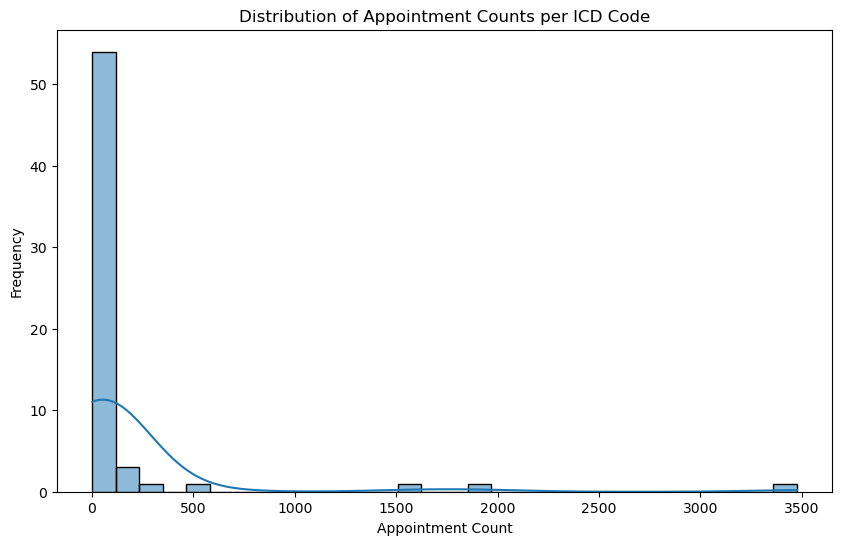

In [44]:
# Plotting the distribution of appointment counts
plt.figure(figsize=(10, 6))
sns.histplot(aggregated_data['appointment_count'], bins=30, kde=True)
plt.title('Distribution of Appointment Counts per ICD Code')
plt.xlabel('Appointment Count')
plt.ylabel('Frequency')
plt.show()


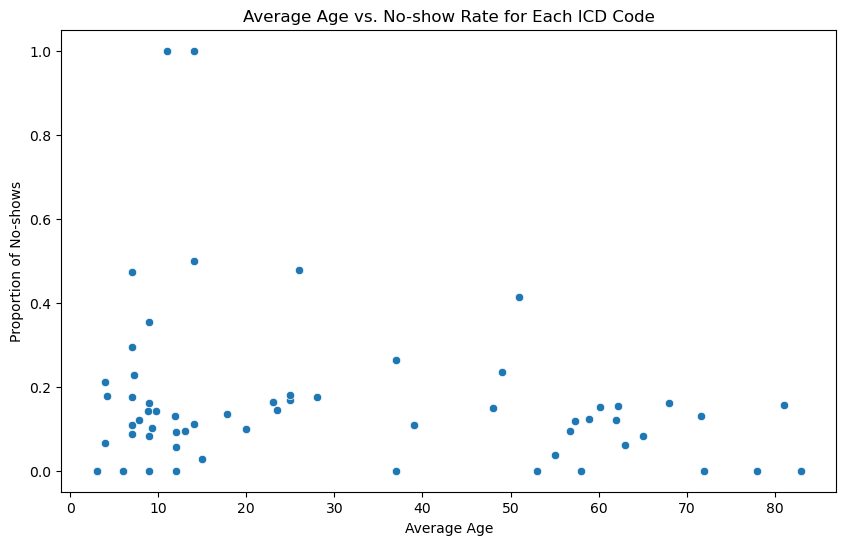

In [45]:
# Scatter plot for average age vs. no-show rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_age', y='proportion_no_show', data=aggregated_data)
plt.title('Average Age vs. No-show Rate for Each ICD Code')
plt.xlabel('Average Age')
plt.ylabel('Proportion of No-shows')
plt.show()


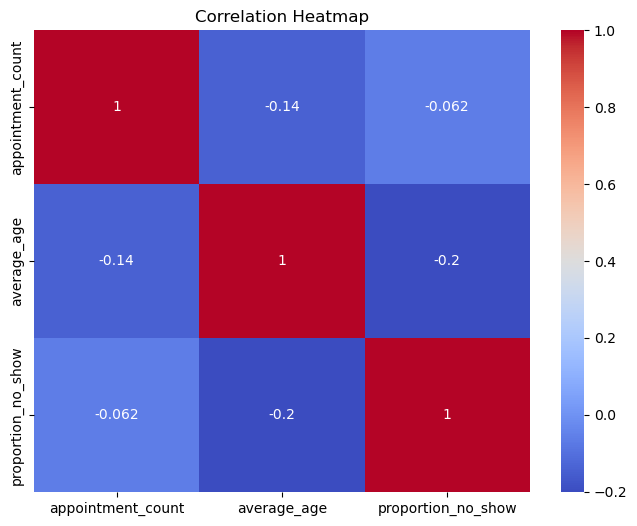

In [46]:
# Calculating correlation matrix
corr_matrix = aggregated_data[['appointment_count', 'average_age', 'proportion_no_show']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [47]:
# 'aggregated_data'  DataFrame and it contains 'average_age' and 'proportion_no_show' columns
younger_patients = aggregated_data[aggregated_data['average_age'] < 30]['proportion_no_show']
older_patients = aggregated_data[aggregated_data['average_age'] >= 30]['proportion_no_show']




In [48]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(younger_patients, older_patients)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.698129575161791, P-value: 0.09466431806492037


In [49]:
# Calculate the correlation coefficient between 'average_age' and 'proportion_no_show'
correlation_coefficient = aggregated_data[['average_age', 'proportion_no_show']].corr()

# Display the correlation matrix
print(correlation_coefficient)


                    average_age  proportion_no_show
average_age            1.000000           -0.201567
proportion_no_show    -0.201567            1.000000


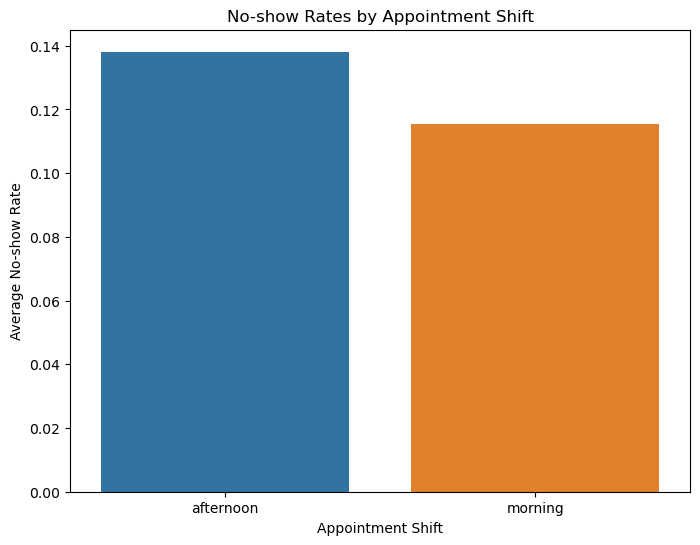

In [51]:
plt.figure(figsize=(8, 6))
sns.barplot(x='appointment_shift', y=data['no_show'].map({'yes': 1, 'no': 0}), estimator=np.mean, errorbar=None, data=data)
plt.title('No-show Rates by Appointment Shift')
plt.ylabel('Average No-show Rate')
plt.xlabel('Appointment Shift')
plt.show()


In [53]:
from scipy.stats import chi2_contingency

# Prepare contingency table
contingency_table = pd.crosstab(data['appointment_shift'], data['no_show'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")



Chi-square test p-value: 0.0006308896477802082


In [54]:
print(contingency_table)


no_show              no  yes
appointment_shift           
afternoon          5341  856
morning            3981  520


In [55]:
# Calculate the no-show rate for each shift
contingency_table['no_show_rate'] = contingency_table['yes'] / (contingency_table['yes'] + contingency_table['no'])

# Print the updated contingency table with no-show rates
print(contingency_table)


no_show              no  yes  no_show_rate
appointment_shift                         
afternoon          5341  856      0.138131
morning            3981  520      0.115530


In [58]:
print(data.columns)






Index(['specialty', 'appointment_time', 'gender', 'appointment_date',
       'no_show', 'no_show_reason', 'disability', 'date_of_birth',
       'entry_service_date', 'city', 'icd', 'appointment_month',
       'appointment_year', 'appointment_shift', 'age', 'under_12_years_old',
       'over_60_years_old', 'patient_needs_companion', 'average_temp_day',
       'average_rain_day', 'max_temp_day', 'max_rain_day', 'rainy_day_before',
       'storm_day_before', 'rain_intensity', 'heat_intensity'],
      dtype='object')


In [60]:
data['rain_intensity'] = pd.to_numeric(data['rain_intensity'], errors='coerce')


print(data['rain_intensity'].isna().sum())



10698


In [61]:
# Calculate quantiles  'rain_intensity' is numeric
low_threshold = data['rain_intensity'].quantile(0.33)
high_threshold = data['rain_intensity'].quantile(0.66)

print(f"Low threshold for rain intensity: {low_threshold}")
print(f"High threshold for rain intensity: {high_threshold}")


Low threshold for rain intensity: nan
High threshold for rain intensity: nan


In [64]:
# Define the categorization function
def categorize_rain_intensity(rain_intensity):
    if pd.isna(rain_intensity):
        return 'Unknown'  
    elif rain_intensity < 5: 
        return 'Low'
    elif rain_intensity < 15:
        return 'Medium'
    else:
        return 'High'


data['rain_intensity_category'] = data['rain_intensity'].apply(categorize_rain_intensity)


In [65]:
print(data['rain_intensity_category'].value_counts(dropna=False))


rain_intensity_category
Unknown    10698
Name: count, dtype: int64


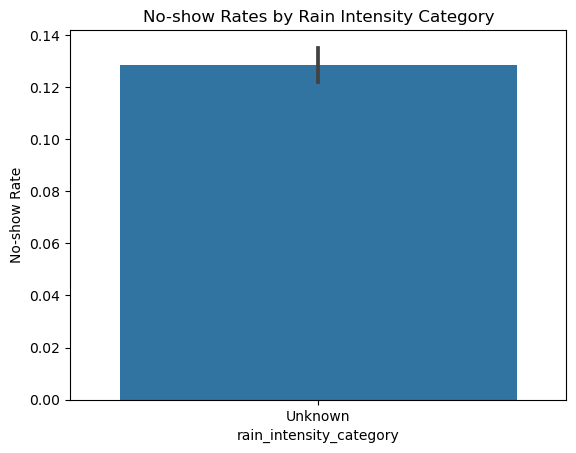

In [66]:
#The barplot
sns.barplot(
    x='rain_intensity_category', 
    y=data['no_show'].map({'yes': 1, 'no': 0}), 
    data=data, 
    estimator=np.mean
)
plt.title('No-show Rates by Rain Intensity Category')
plt.ylabel('No-show Rate')
plt.show()
